# Using a zero-phase filter instead of bandpass + manual-delay-matching

This is just to see how we can implement the bandpass filter Bechadergue mentions. They pass the signal through an analog filter (one pass, forward). This of course shifts the signal phase considerably, but the shift is deterministic and known since the carrier frequency is known. However, rather than going through with this procedure in simulation, we can simply do zero phase filtering on the whole signal and scale the amplitude accordingly to produce the same effect (two passes, one forward and one backward).

In [1]:
import numpy             as np
import scipy             as sp
import matplotlib.pyplot as plt
import time
from scipy           import signal
from scipy.signal    import sosfiltfilt as sff

In [2]:
dt = 1e-8;
f  = 1e6;
stop = 0.001
t = np.linspace(dt, stop, int(stop/dt))
x = 0.5*np.sin(2*np.pi*f*t)
s = 0.1
n = np.random.normal(scale=s, size=x.shape[0])

r = x + n

In [3]:
bandpass = signal.butter(8, [2*(f*0.95)*dt, 2*(f*1.05)*dt], 'bandpass', output='sos')

In [4]:
y = sff(bandpass, r)

In [5]:
nf = sff(bandpass, n)
xf = x
yf = xf + nf

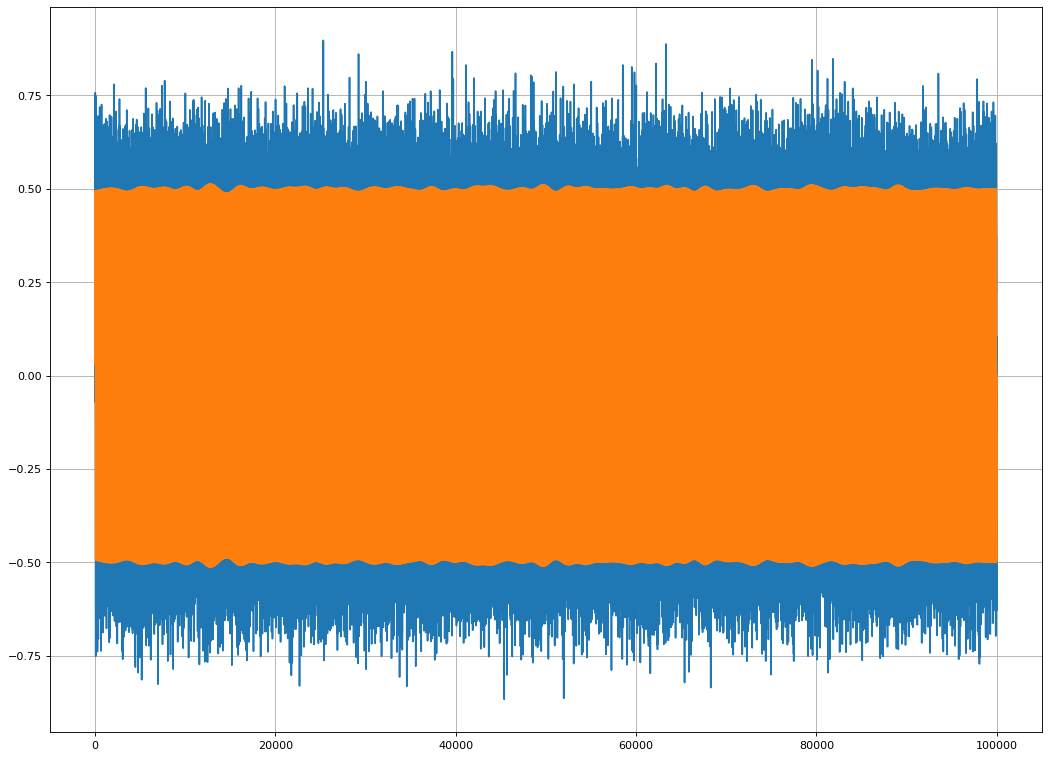

In [6]:
fig, ax = plt.subplots(figsize=(16, 12), dpi=80)
ax.plot(r)
ax.plot(yf)
ax.grid()
plt.show()

# Simulating filter behavior with minimal computation

Our received signal is

$r_{i}(t) = \sum\limits_{j} r_{ij}(t)  + \mu_{i}(t) ~~,~~ r_{ij}(t) = H_{ij}\cdot s_{j}(t - \tau_{ij})$

To see the effect of the analog bandpass filter proposed by bechadergue, we could simply add the noise and then filter. 

However, since the noise is AWGN, and since we assume linear filters, we could simply scale the bandwidth $B_i$ component in the variance of the term $\mu_{i}(t)$ to match the filter bandwidth for generating the bandlimited AWGN in the same manner. This is reasonable since they propose at least 4th order filters so the passband is pretty much isolated.

This considerably reduces the computation needed in simulations since scipy filtering implementations are memory hogs.